## Importing and downloading libraries

In [2]:
import nltk
import numpy as np
import pandas as pd
import spacy
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
nltk.download("stopwords")
nltk.download("punkt")
from string import punctuation

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A0826873\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A0826873\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading file into data set

In [4]:
data = pd.read_csv("./Data/DataSet.csv")

## Printing size, shape and descriptions and information

In [5]:
print(data.head())
print("\nSize %s" % data.size)
print("\nShpae {}".format(data.shape))
print(data.describe())
print(data.info())

                                                post         tags
0  what is causing this behavior  in our c# datet...           c#
1  have dynamic html load as if it was in an ifra...      asp.net
2  how to convert a float value in to min:sec  i ...  objective-c
3  .net framework 4 redistributable  just wonderi...         .net
4  trying to calculate and print the mean and its...       python

Size 80000

Shpae (40000, 2)
                                                     post   tags
count                                               40000  40000
unique                                              40000     20
top     what is causing this behavior  in our c# datet...     c#
freq                                                    1   2000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    40000 non-null  object
 1   tags    40000 non-null  obje

## Removing stopwords and punctuations

In [7]:
punctuations = list(punctuation)
stop_words = stopwords.words("english")
data["post_m"] = data["post"].map(
    lambda r: [
        token
        for token in word_tokenize(r)
        if token not in stop_words and token not in punctuations
    ]
)
data.head()

,post,tags,post_m
0,what is causing this behavior in our c# datet...,c#,"[causing, behavior, c, datetime, type, pre, co..."
1,have dynamic html load as if it was in an ifra...,asp.net,"[dynamic, html, load, iframe, asp.net, 4.0, si..."
2,how to convert a float value in to min:sec i ...,objective-c,"[convert, float, value, min, sec, trying, conv..."
3,.net framework 4 redistributable just wonderi...,.net,"[.net, framework, 4, redistributable, wonderin..."
4,trying to calculate and print the mean and its...,python,"[trying, calculate, print, mean, returning, fu..."


In [8]:
data["post_m"] = data.post_m.apply(lambda post: " ".join(post))

In [9]:
data.head()

,post,tags,post_m
0,what is causing this behavior in our c# datet...,c#,causing behavior c datetime type pre code test...
1,have dynamic html load as if it was in an ifra...,asp.net,dynamic html load iframe asp.net 4.0 site user...
2,how to convert a float value in to min:sec i ...,objective-c,convert float value min sec trying convert sec...
3,.net framework 4 redistributable just wonderi...,.net,.net framework 4 redistributable wondering get...
4,trying to calculate and print the mean and its...,python,trying calculate print mean returning function...


Create two objects X and y. X will be the ' post’ column of the above dataframe and y will be the ' tag' column. Create a CountVectorizer object and split the data into training and testing sets. Train a Multino mialNB model for classifying the tag label of reviews and Display the confusion Matrix (5 Marks)[Creating Multinominal NB model is higher complexity Question. To get full marks it must be addressed properly ]

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", max_features=20000)
X = vectorizer.fit_transform(data["post_m"])
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'در', 'دستگاه', 'پرداخت'], dtype=object)

In [11]:
X.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
y = data.tags
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'tag'.
y = label_encoder.fit_transform(data["tags"])

print(y)

[ 5  3 15 ...  4  2  1]


In [13]:
# splitting the data set into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X.toarray(), y, test_size=0.25, random_state=0
)

In [14]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30000, 20000), (30000,), (10000, 20000), (10000,))

In [16]:
# fitting naive bayes to the training set
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# predicting test set results
y_pred = classifier.predict(X_test)

# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[203,   6,   7,  59,   8,  54,  19,  26,   4,   9,  32,   7,   4,
         12,   2,   5,   4,   7,   9,  15],
       [ 12, 356,   7,   7,   1,   3,   4,  27,  12,  30,  32,  18,   2,
          5,   4,   4,   5,   3,  10,   0],
       [ 13,   1, 345,   6,   0,   5,   1,  22,  24,   3,   2,   4,  21,
         14,   0,   0,   8,   3,  40,   1],
       [ 85,   2,   7, 229,   0,  31,   1,  41,  13,   1,  12,   1,   7,
         33,   1,   0,   8,   5,   6,   9],
       [ 18,   0,   0,   1, 236,  13, 128,   8,   2,   5,  13,  22,   9,
          6,   3,  17,  17,  12,   1,   2],
       [ 93,   6,   3,  58,  12, 145,  21,  12,   7,   5,  12,  15,  17,
         15,   9,  11,  10,  15,   4,  15],
       [ 27,   2,   4,   3,  83,  13, 241,   7,   2,   5,  10,  21,   7,
         10,   3,  27,   8,  24,   2,   5],
       [  5,   3,  17,  11,   2,   2,   1, 306,  57,   3,   4,   1,  22,
         36,   1,   2,   9,   3,   6,   1],
       [ 20,   4,  20,  25,   4,   5,   4, 149,  87,   1,  18,  

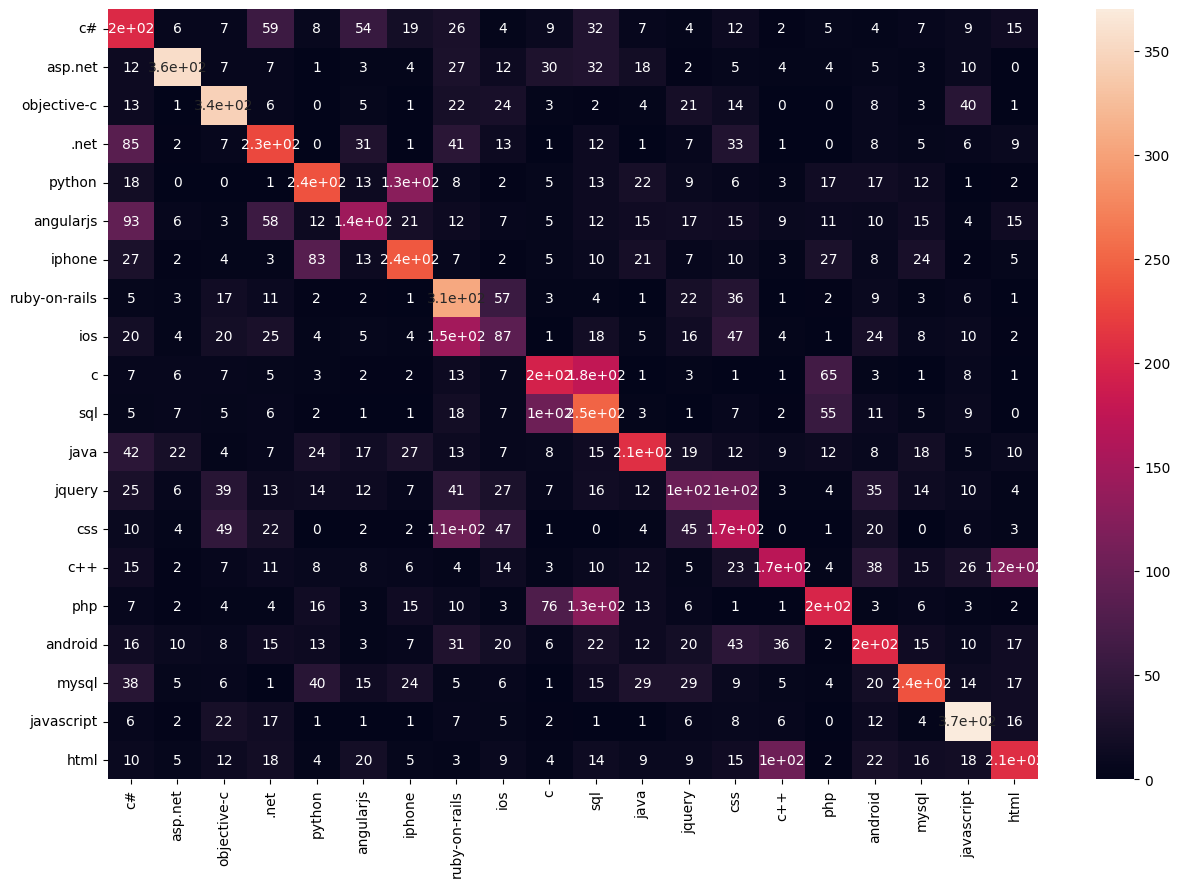

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

fig = plt.figure(figsize=(15, 10))
cm_array_df = pd.DataFrame(cm, index=data.tags.unique(), columns=data.tags.unique())
sn.heatmap(cm_array_df, annot=True, annot_kws={"size": 10})
# sn.heatmap(cm)
# fig.x_ticks()
plt.show()

## Display the HMM POS tagging on the first 4 rows of ‘post’ (3 Marks)

In [18]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

for i in range(0, 4):
    doc = nlp(data.post_m[i])
    displacy.render(doc, style="dep")